In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

path_to_kammi = os.path.join(os.getcwd(), "leonardo", "leonardo_pulito.csv")
path_to_leo = os.path.join(os.getcwd(), "kammi", "kammi_pulito.csv")
df_kammi = pd.read_csv(path_to_kammi)
df_leo = pd.read_csv(path_to_leo)

# Cleaning
df_kammi["prezzo"] = df_kammi["prezzo"].str.replace("€", "")
df_leo["prezzo"] = df_leo["prezzo"].str.replace("€","")
df_kammi["prezzo"] = df_kammi["prezzo"].astype("float")
df_leo["prezzo"] = df_leo["prezzo"].astype("float")


##### Comparazione dei prodotti: numero modelli offerti

In [9]:
scarpe_estive_kammi = df_kammi["nome"].count()

In [10]:
scarpe_estive_leo = df_leo["nome_prodotto"].count()

<AxesSubplot: title={'center': '\nNumero totale di scarpe estive in offerta\n'}>

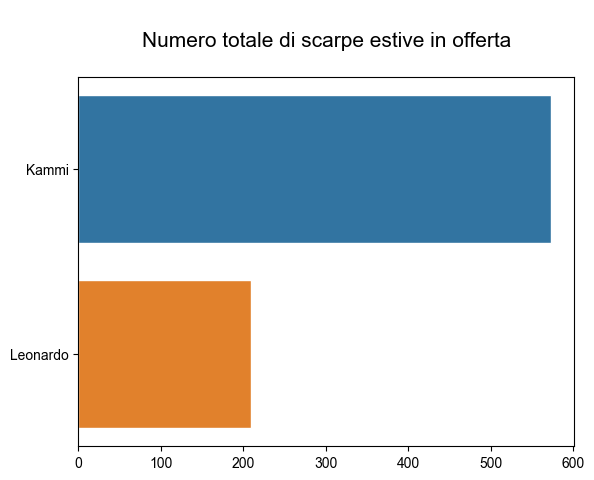

In [11]:
fig, ax = plt.subplots()
plt.title("\nNumero totale di scarpe estive in offerta\n", size = 15)
sns.set_style("whitegrid")
labels = ["Kammi", "Leonardo"]
sns.barplot(x = [scarpe_estive_kammi, scarpe_estive_leo], y = labels, hue = labels)

##### Comparazione dei prodotti: confronto prezzi con minimi, massimi e medie

Text(0.5, 0.98, 'Massimi minimi e medie dei prezzi\n')

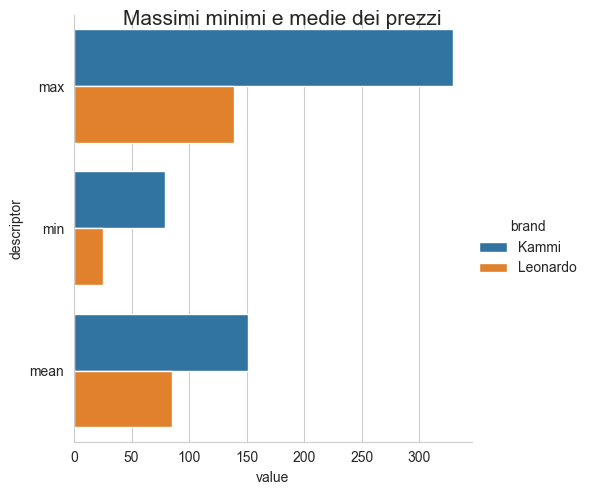

In [12]:
max_prezzo_kammi = df_kammi["prezzo"].max()
min_prezzo_kammi = df_kammi["prezzo"].min()
mean_prezzo_kammi = df_kammi["prezzo"].mean()
max_prezzo_leo = df_leo["prezzo"].max()
min_prezzo_leo = df_leo["prezzo"].min()
mean_prezzo_leo = df_leo["prezzo"].mean()
dict_to_df = {
    "max": [max_prezzo_kammi, max_prezzo_leo],
    "min": [min_prezzo_kammi, min_prezzo_leo],
    "mean" : [mean_prezzo_kammi, mean_prezzo_leo],
    "brand": ["Kammi", "Leonardo"]
}

df_to_plot = pd.DataFrame(dict_to_df).T
df_to_plot
df_to_plot.columns = df_to_plot.iloc[-1]
df_to_plot = df_to_plot.drop("brand")
df_to_plot["descriptor"] = df_to_plot.index
df_to_plot
dfm = pd.melt(df_to_plot, id_vars="descriptor", var_name="brand", value_name="value")
sns.catplot(dfm, x = "value", y = "descriptor", hue = "brand", kind = "bar").fig.suptitle('Massimi minimi e medie dei prezzi\n', size = 15)

<AxesSubplot: title={'center': '\nConteggio dei colori offerti da Leonardo\n'}, xlabel='colore', ylabel='None'>

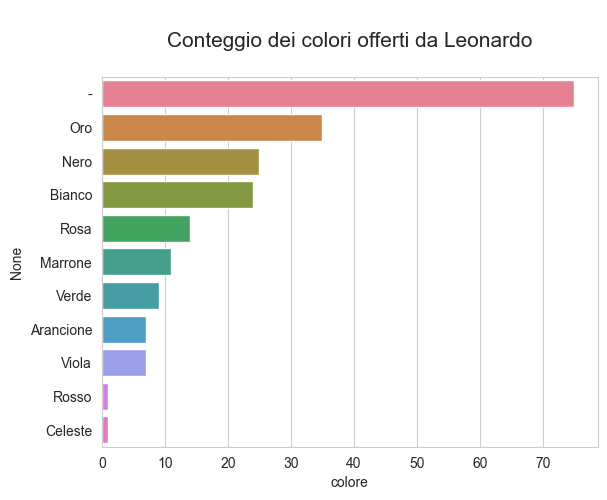

In [13]:
fig, ax = plt.subplots()
plt.title("\nConteggio dei colori offerti da Leonardo\n", size = 15)
df_plot = pd.DataFrame(df_leo["colore"].value_counts())
sns.barplot(df_plot, y = df_plot.index, x = "colore", orient = "h", hue = df_plot.index)

<AxesSubplot: title={'center': '\nConteggio dei colori offerti da Kammi\n'}, xlabel='colore', ylabel='None'>

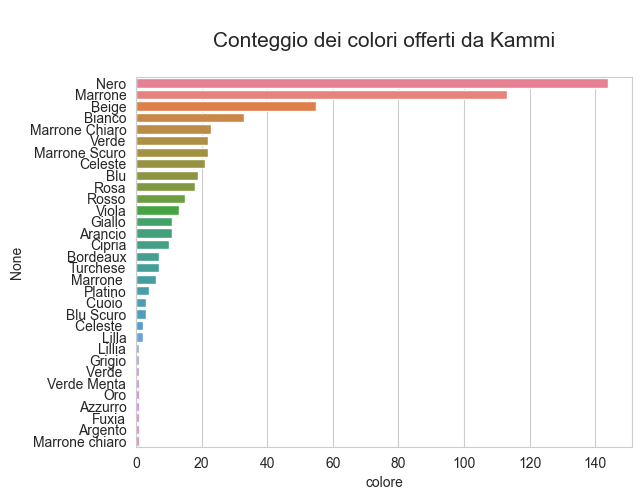

In [14]:
fig, ax = plt.subplots()
plt.title("\nConteggio dei colori offerti da Kammi\n", size = 15)

df_plot = pd.DataFrame(df_kammi.loc[df_kammi["colore"] != "-"]["colore"].value_counts())
sns.barplot(df_plot, y = df_plot.index, x = "colore", orient = "h", hue = df_plot.index)

#### Distribuzione delle taglie

<AxesSubplot: title={'center': '\nDistribuzione delle taglie offerte da Kammi\n'}, xlabel='taglia', ylabel='count'>

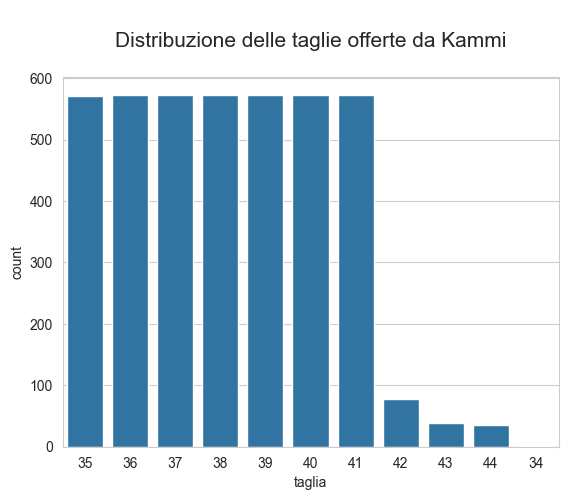

In [15]:
numeri = {}
for row in df_kammi["taglie"]:
    for taglia in row.split(" "):
        if taglia not in numeri.keys():
            numeri[taglia] = 1
        else:
            numeri[taglia] += 1
numeri = {"taglia":list(numeri.keys()), "count": list(numeri.values())}
numeri
df_numeri = pd.DataFrame(numeri)
df_numeri

fig, ax = plt.subplots()
plt.title("\nDistribuzione delle taglie offerte da Kammi\n", size = 15)

sns.barplot(df_numeri, x = "taglia", y = "count")

<AxesSubplot: title={'center': '\nDistribuzione delle taglie offerte da Leonardo\n'}, xlabel='taglia', ylabel='count'>

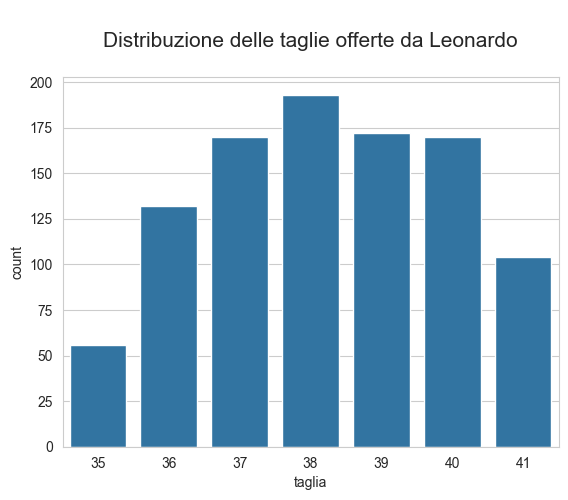

In [16]:
numeri = {}
for row in df_leo["taglie"]:
    for taglia in row.split(" "):
        if taglia not in numeri.keys():
            numeri[taglia] = 1
        else:
            numeri[taglia] += 1
numeri = {"taglia":list(numeri.keys()), "count": list(numeri.values())}
df_numeri = pd.DataFrame(numeri)

df_numeri = df_numeri.sort_values(by = "taglia")

fig, ax = plt.subplots()
plt.title("\nDistribuzione delle taglie offerte da Leonardo\n", size = 15)

sns.barplot(df_numeri, x = "taglia", y = "count")


In [18]:
df_leo_comparison = df_leo[["nome_prodotto", "categoria"]]
df_leo_comparison

,nome_prodotto,categoria
0,Zeppa 3326,Zeppe
1,Zeppa L3402,Zeppe
2,Zeppa 100,Zeppe
3,Zeppa 340,Zeppe
4,Zeppa 902,Zeppe
...,...,...
204,Ciabatta 271,Sandali Bassi
205,Ciabatta 407,Sandali Bassi
206,Ciabatta new D,Sandali Bassi
207,Ciabatta new D,Sandali Bassi


In [20]:
df_kammi_comparison = df_kammi[["nome", "categoria"]]
df_kammi_comparison

,nome,categoria
0,Ballerina casual da donna in pelle liscia colo...,Ballerine
1,Ballerine da donna color nero in pelle scamosc...,Ballerine
2,Ballerine da donna color celeste in pelle scam...,Ballerine
3,Ballerine da donna color lilla in pelle scamos...,Ballerine
4,Ballerine da donna color verde in pelle scamos...,Ballerine
...,...,...
568,Sandalo chiuso tacco medio da donna a punta in...,Sandali
569,Sandalo chiuso tacco medio da donna a punta in...,Sandali
570,Sandalo aperto da donna con tacco basso in pel...,Sandali
571,Sandali Arcadia da donna stile romano antico i...,Sandali
